<a href="https://colab.research.google.com/github/franciscosalido/AIML/blob/master/Bank_Personal_Loan_Campaign_with_Tensorflow2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Thera Bank Personal Loan Campaign**

## Data Description:

> The  file  Bank.xls  contains  data  on  5000  customers.  The  data  include  customer  demographic information (age, income, etc.), the customer's relationship with the bank (mortgage, securities account,  etc.), and the  customer  response to  the  last  personal  loan  campaign  (Personal  Loan). Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was offered to them in the earlier campaign.

## Domain:

> Banking

## Context:

> This case is about a bank (Thera Bank) whose management wants to explore ways of converting its  liability  customers  to  personal  loan  customers  (while  retaining  them  as  depositors).  A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over9%  success.  This  has  encouraged  the  retail  marketing  department  to  devise  campaigns with better target marketing to increase the success ratio with a minimal budget.

##Attribute Information:

> > 
* ID: Customer ID 
* Age: Customer's age in completed years
* Experience: # years of professional experience
* Income: Annual income of the customer
* ZIP Code: Home Address ZIPcode.
* Family: Family size of thecustomer
* CCAvg: Avg. spending on credit cards per month
* Education: Education Level: 
 * 1: Undergrad; 
 * 2: Graduate;
 * 3:Advanced/Professional.
* Mortgage: Value of house mortgage if any.
* Personal Loan: Did this customer accept the personal loan offered in the last campaign?
* Securities Account: Does the customer have a securities account with the bank?
* CD Account: Does the customer have a certificate of deposit (CD) account with the bank?
* Online: Does the customer use internet banking facilities?
* Credit card: Does the customer use a credit card is sued by the bank?






---

## Learning Outcomes:

> >
* Exploratory Data Analysis (EDA)
* Preparing the data to train a model
* Training and making predictions using a classification model
* Model evaluation Objective: The classification goal is to predict the likelihood of a liability customer buying personal loans.



## Steps and tasks:


1.   Import the datasets and libraries, check datatype, statistical summary,shape,null values or incorrect imputation. (5 marks)


2.   EDA:  Study  the  data  distribution  in  each  attribute  and  target  variable,  share  your  findings (20 marks) 
* Number of unique in each column?
* Number of people with zero mortgage? 
* Number of people with zero credit card spending per month? 
* Value counts of all categorical columns. 
* Univariate and Bivariate 
* Get data model ready



3.   Split the data into training and test seting the ratio of 70:30 respectively (5marks)


4.  Use Logistic Regression model to predict the number of a customer buying personal loans. Print all the metrics related for evaluating the model performance (15marks)


5.  Give your reasoning on how can the model perform better? (10 marks)
>> 
Hint: Check parameter


6.  Give Business understanding of your model? (5 marks)

##### 0. Preface

In [0]:
#!/usr/bin/python
# Date: 2020/04/25
# Code by Francisco Arruda Salido
# Version: 1.0.0

##### 1.a. Import the libraries

In [0]:
# import structures and data analysis libraries
import io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# automaticly render any figure in a notebook made with this library
%matplotlib inline

In [0]:
# import machine learning libraries
import sklearn
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, recall_score, precision_score, f1_score, roc_curve, roc_auc_score,accuracy_score

##### 1.b. Import the dataset

In [71]:
# Mount the google drive and set the path to the dataset
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [72]:
root_path = '/content/drive/My\ Drive/AIML/BankLoanCampaign/'  #set a dir to the project folder
!ls /content/drive/My\ Drive/AIML/BankLoanCampaign/ #change dir to the project folder

Bank_Personal_Loan_Modelling.csv


In [0]:
data = pd.read_csv('/content/drive/My Drive/AIML/BankLoanCampaign/Bank_Personal_Loan_Modelling.csv') #import the dataset Data.csv from specific path

###### 1.b Housekipping

In [0]:
np.set_printoptions(precision=3, suppress=True) # Make numpy values easier to read.

pd.set_option("display.precision", 3) # Use 3 decimal places in output display

pd.set_option("display.expand_frame_repr", False) # Don't wrap repr(DataFrame) across additional lines

pd.set_option("display.max_rows", 25) # Set max rows displayed in output to 25

##### 1.c Check Datatype

In [75]:
data.shape

(5000, 14)

In [76]:
data.head() # check the name of the columns and the first 5 rows

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [77]:
data.info(); # check some information about the variables (columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


##### 1.d Statistical Summary

In [0]:
# Creating a copy of the Data for manipulation
df = data.copy()

In [79]:
df = df.drop(['ID', 'ZIP Code'], axis= 1) # drop the categorical columns 'ID' and 'ZIP Code'

df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338,11.463,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,20.105,11.468,-3.0,10.0,20.0,30.0,43.0
Income,5000.0,73.774,46.034,8.0,39.0,64.0,98.0,224.0
Family,5000.0,2.396,1.148,1.0,1.0,2.0,3.0,4.0
CCAvg,5000.0,1.938,1.748,0.0,0.7,1.5,2.5,10.0
Education,5000.0,1.881,0.840,1.0,1.0,2.0,3.0,3.0
Mortgage,5000.0,56.499,101.714,0.0,0.0,0.0,101.0,635.0
Personal Loan,5000.0,0.096,0.295,0.0,0.0,0.0,0.0,1.0
Securities Account,5000.0,0.104,0.306,0.0,0.0,0.0,0.0,1.0
CD Account,5000.0,0.060,0.238,0.0,0.0,0.0,0.0,1.0


In [80]:
#  Rearranging the columns orders for bringing the "Personal Loan " to the end of the dataframe.
personal_loan = df['Personal Loan']
df.drop(['Personal Loan'], axis = 1,inplace = True)
df['Personal Loan'] = personal_loan
df.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Personal Loan
0,25,1,49,4,1.6,1,0,1,0,0,0,0
1,45,19,34,3,1.5,1,0,1,0,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,1,0


1. Shape

In [81]:
df.shape # check the shape after droping and rearrangig columns

(5000, 12)

###### 1.e Check for invalid values

In [82]:
df.isnull().sum() # check for null values by row

Age                   0
Experience            0
Income                0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
Personal Loan         0
dtype: int64

In [83]:
df.isnull().sum().any() # check for null values in the dataframe

False

In [84]:
# Checking the Dataframe Distributions
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338,11.463,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,20.105,11.468,-3.0,10.0,20.0,30.0,43.0
Income,5000.0,73.774,46.034,8.0,39.0,64.0,98.0,224.0
Family,5000.0,2.396,1.148,1.0,1.0,2.0,3.0,4.0
CCAvg,5000.0,1.938,1.748,0.0,0.7,1.5,2.5,10.0
Education,5000.0,1.881,0.840,1.0,1.0,2.0,3.0,3.0
Mortgage,5000.0,56.499,101.714,0.0,0.0,0.0,101.0,635.0
Securities Account,5000.0,0.104,0.306,0.0,0.0,0.0,0.0,1.0
CD Account,5000.0,0.060,0.238,0.0,0.0,0.0,0.0,1.0
Online,5000.0,0.597,0.491,0.0,0.0,1.0,1.0,1.0


###### There is negative values in the 'Experience' column

In [85]:
# Experience can't be a negative values
df[df['Experience'] <= -1]['Experience'].count() # count the total of negative numbers in the 'Experience' row

52

In [0]:
# Get the numeric data from the 'Experience' column and replace just the negatives value by the Mode() function (Median() will be afected by the negative values) 
df.loc[(df['Experience'] <= -1), 'Experience'] = df['Experience'].mode()

In [87]:
# Checking the new distribution in 'Experience'
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338,11.463,23.0,35.00,45.0,55.0,67.0
Experience,4948.0,20.331,11.312,0.0,10.75,20.0,30.0,43.0
Income,5000.0,73.774,46.034,8.0,39.00,64.0,98.0,224.0
Family,5000.0,2.396,1.148,1.0,1.00,2.0,3.0,4.0
CCAvg,5000.0,1.938,1.748,0.0,0.70,1.5,2.5,10.0
Education,5000.0,1.881,0.840,1.0,1.00,2.0,3.0,3.0
Mortgage,5000.0,56.499,101.714,0.0,0.00,0.0,101.0,635.0
Securities Account,5000.0,0.104,0.306,0.0,0.00,0.0,0.0,1.0
CD Account,5000.0,0.060,0.238,0.0,0.00,0.0,0.0,1.0
Online,5000.0,0.597,0.491,0.0,0.00,1.0,1.0,1.0


In [88]:
# Cheking again if 'Experience' has any negative values
df[df['Experience'] <= -1]['Experience'].count()

0

### 2. Exploratory Data Analysis:

##### 2.1 Number of unique in each column?

In [89]:
df.nunique()

Age                    45
Experience             44
Income                162
Family                  4
CCAvg                 108
Education               3
Mortgage              347
Securities Account      2
CD Account              2
Online                  2
CreditCard              2
Personal Loan           2
dtype: int64

In [90]:
df.apply(lambda x: len(x.unique()))

Age                    45
Experience             45
Income                162
Family                  4
CCAvg                 108
Education               3
Mortgage              347
Securities Account      2
CD Account              2
Online                  2
CreditCard              2
Personal Loan           2
dtype: int64

2.2 Number of people with zero mortgage?

In [91]:
a= df['Mortgage'].isin([0]).sum()
print('The number of clients with zero Mortgage are {}'.format(a))

The number of clients with zero Mortgage are 3462


2.3 Number of people with zero credit card spending per month?

In [92]:
b= df['CCAvg'].isin([0]).sum()
print('The number of clients with zero Credit Card spending are {}'.format(b))

The number of clients with zero Credit Card spending are 106


#### 2.4 Value counts of all categorical columns.

In [0]:
# list of Columns Types
numerical_columns_list= ('Age', 'Experience', 'Income', 'CCAvg', 'Mortgage')
categorical_columns_list= ('Family',	'Education',	'Personal Loan',	'Securities Account', 'CD Account',	'Online',	'CreditCard') 

#### 2.4.1 Categorical Columns

2.4.1.1 Family

In [94]:
# Family value count and Percetantage
family_count = pd.Series(df['Family'].squeeze().values.ravel()).value_counts()
pd.DataFrame({'Count':family_count.values, 'Percentage':(family_count/family_count.sum()).values})

,Count,Percentage
0,1472,0.294
1,1296,0.259
2,1222,0.244
3,1010,0.202


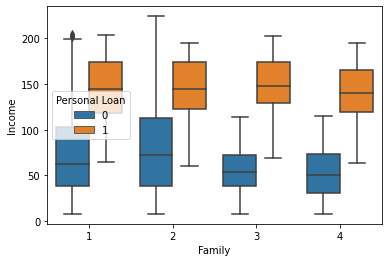

In [95]:
# Family value per Income grouped by Personal Loan
sns.boxplot(x='Family',y='Income',hue='Personal Loan',data=df);

#### 2.4.1.2 Education

In [96]:
# Education value count and Percetantage
education_count = pd.Series(df['Education'].squeeze().values.ravel()).value_counts()
pd.DataFrame({'Count':education_count.values, 'Percentage':(education_count/education_count.sum()).values})

,Count,Percentage
0,2096,0.419
1,1501,0.300
2,1403,0.281


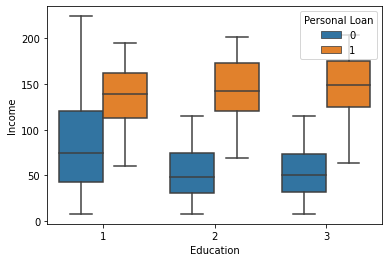

In [97]:
# Education degree per Income grouped by Personal Loan
sns.boxplot(x='Education',y='Income',hue='Personal Loan',data=df);

2.4.1.3 Personal Loan

In [98]:
# Personal Loan value count and Percetantage
personalloan_count = pd.Series(df['Personal Loan'].squeeze().values.ravel()).value_counts()
pd.DataFrame({'Count':personalloan_count.values, 'Percentage':(personalloan_count/personalloan_count.sum()).values})

,Count,Percentage
0,4520,0.904
1,480,0.096


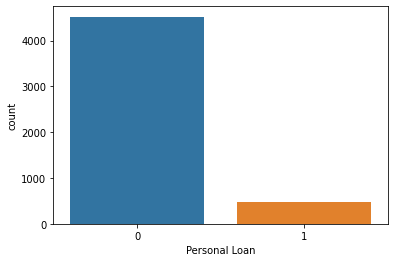

In [99]:
# Personal Loan plot
sns.countplot(x="Personal Loan", data=df);

###### This is a assimetry distribution in Personal Loan 

#### 2.4.1.4 Securities Account

In [100]:
securitiesaccount_count = pd.Series(df['Securities Account'].squeeze().values.ravel()).value_counts()
pd.DataFrame({'Count':securitiesaccount_count.values, 'Percentage':(securitiesaccount_count/securitiesaccount_count.sum()).values})

,Count,Percentage
0,4478,0.896
1,522,0.104


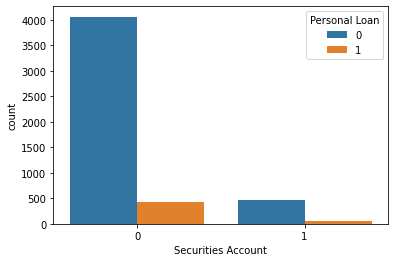

In [101]:
# Security Account plot
sns.countplot(x="Securities Account", data=df,hue="Personal Loan");

###### This is a assimetry distribution in Security Account and
###### The majority of customers who doesn´t have loan have securities account

#### 2.4.1.5 CD Account

In [102]:
# CD Account count value and Percentage
cdaccount_count = pd.Series(df['CD Account'].squeeze().values.ravel()).value_counts()
pd.DataFrame({'Count':cdaccount_count.values, 'Percentage':(cdaccount_count/cdaccount_count.sum()).values})

,Count,Percentage
0,4698,0.94
1,302,0.06


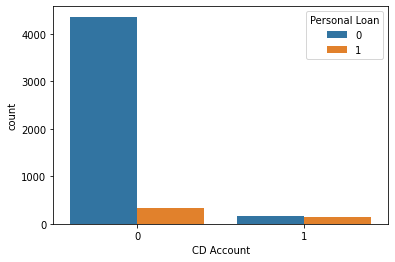

In [103]:
# CD Account plot
sns.countplot(x='CD Account', data=df,hue="Personal Loan");

#### 2.4.1.6 Online

In [104]:
# Online count value and Percentage
online_count = pd.Series(df['Online'].squeeze().values.ravel()).value_counts()
pd.DataFrame({'Count':online_count.values, 'Percentage':(online_count/online_count.sum()).values})

,Count,Percentage
0,2984,0.597
1,2016,0.403


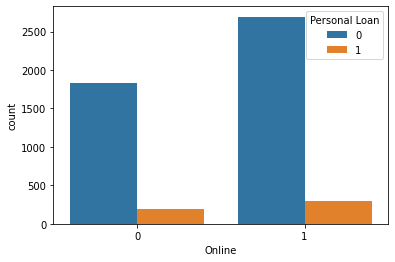

In [105]:
# Online plot
sns.countplot(x='Online', data=df,hue="Personal Loan");

#### 2.4.1.7 CreditCard

In [106]:
# Online count value and Percentage
creditcard_count = pd.Series(df['CreditCard'].squeeze().values.ravel()).value_counts()
pd.DataFrame({'Count':creditcard_count.values, 'Percentage':(creditcard_count/creditcard_count.sum()).values})

,Count,Percentage
0,3530,0.706
1,1470,0.294


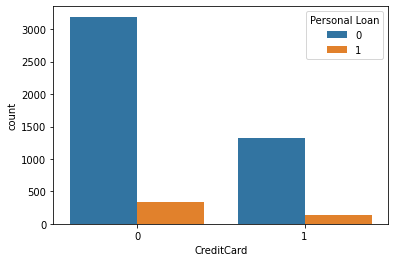

In [107]:
# Credit Card plot
sns.countplot(x='CreditCard', data=df,hue="Personal Loan");

#### 2.5.2 Numerical data 

2.5.2.1 Income 

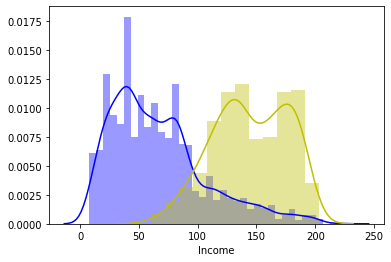

In [108]:
# Histogram plot for Income distribution by Personal Loan
sns.distplot(df[df["Personal Loan"] == 0]['Income'], color = 'b')
sns.distplot(df[df["Personal Loan"] == 1]['Income'], color = 'y');

The graph show those who have personal loan also have a higher income.

##### Checking for correlation

In [109]:
# check correlation between personal loan and numerical variables
df[['Personal Loan', 'Age', 'Income', 'CCAvg', 'Mortgage']].corr()

,Personal Loan,Age,Income,CCAvg,Mortgage
Personal Loan,1.000,-0.008,0.502,0.367,0.142
Age,-0.008,1.000,-0.055,-0.052,-0.013
Income,0.502,-0.055,1.000,0.646,0.207
CCAvg,0.367,-0.052,0.646,1.000,0.110
Mortgage,0.142,-0.013,0.207,0.110,1.000


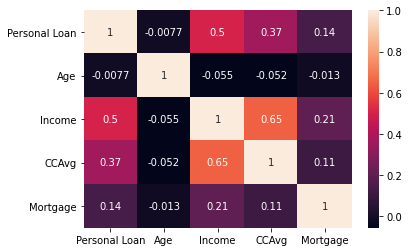

In [110]:
# correlation heatmap between personal loan and numerical variables
sns.heatmap(df[['Personal Loan', 'Age', 'Income', 'CCAvg', 'Mortgage']].corr(), annot = True);

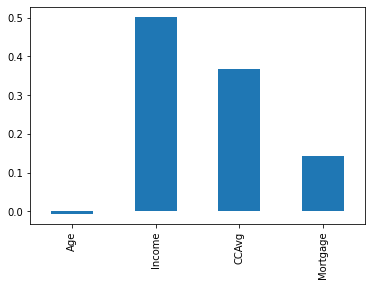

In [111]:
df[['Personal Loan', 'Age', 'Income', 'CCAvg', 'Mortgage']].corr()['Personal Loan'][1:].plot.bar();

###### There is a high correlation between the independant variable and dependant variables as we see in 'Income' and 'Credit Card Average' has some correlation with 'Personal Loan'.

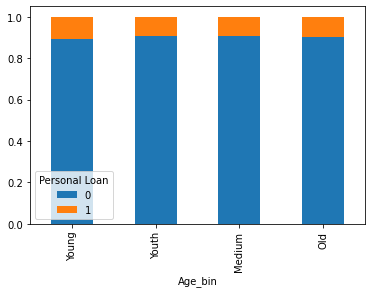

In [112]:
bins= [23, 35, 45, 55, 65]                            # Create 4 age bins
group= ['Young', 'Youth', 'Medium', 'Old']            # Name the age bins
df['Age_bin']=pd.cut(df['Age'], bins, labels= group ) # Converting numeric into categorical variable
age= pd.crosstab(df['Age_bin'], df['Personal Loan']) 
age.div(age.sum(1).astype(float), axis=0).plot(kind='bar', stacked= True);

###### Applicant age-goup does not affect the chances of buying the personal loan

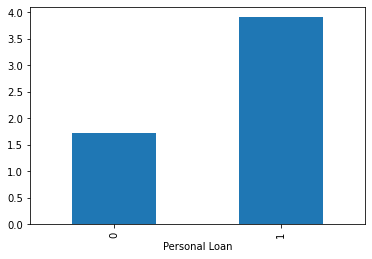

In [113]:
df.groupby('Personal Loan')['CCAvg'].mean().plot(kind='bar');

###### It can be clearly seen that applicants who spend more on credit cards are more viable to buy personal loans

### 2.6 Get data model ready

In [114]:
data.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.00,5000.000,5000.000,5000.000,5000.000,5000.000,5000.000,5000.000,5000.000,5000.000,5000.000,5000.000,5000.000,5000.000
mean,2500.50,45.338,20.105,73.774,93152.503,2.396,1.938,1.881,56.499,0.096,0.104,0.060,0.597,0.294
std,1443.52,11.463,11.468,46.034,2121.852,1.148,1.748,0.840,101.714,0.295,0.306,0.238,0.491,0.456
min,1.00,23.000,-3.000,8.000,9307.000,1.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,1250.75,35.000,10.000,39.000,91911.000,1.000,0.700,1.000,0.000,0.000,0.000,0.000,0.000,0.000
50%,2500.50,45.000,20.000,64.000,93437.000,2.000,1.500,2.000,0.000,0.000,0.000,0.000,1.000,0.000
75%,3750.25,55.000,30.000,98.000,94608.000,3.000,2.500,3.000,101.000,0.000,0.000,0.000,1.000,1.000
max,5000.00,67.000,43.000,224.000,96651.000,4.000,10.000,3.000,635.000,1.000,1.000,1.000,1.000,1.000


In [0]:
# Lets drop some categorical and numerical columns without Personal Loan correlation
cleaned_df = data.drop(['ID', 'Age', 'Experience', 'ZIP Code', 'Family', 'Education', 'Securities Account', 'CD Account', 'Online', 'CreditCard'], axis=1)

In [116]:
#  Rearranging the columns orders for bringing the "Personal Loan " to the end of the dataframe.
personal_loan = cleaned_df['Personal Loan']
cleaned_df.drop(['Personal Loan'], axis = 1,inplace = True)
cleaned_df['Personal Loan'] = personal_loan
cleaned_df.head()

,Income,CCAvg,Mortgage,Personal Loan
0,49,1.6,0,0
1,34,1.5,0,0
2,11,1.0,0,0
3,100,2.7,0,0
4,45,1.0,0,0


#### Bivariate Resume

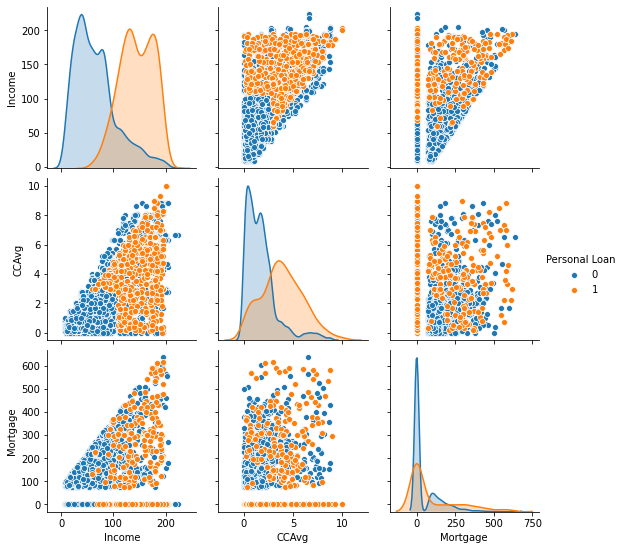

In [117]:
# Data distribution using Personal Loan as hue:
sns.pairplot(cleaned_df, hue='Personal Loan');

### 3. Split the data into training and test seting the ratio of 70:30 respectively (5marks)

In [0]:
X = cleaned_df.drop('Personal Loan', axis=1) # define X variable
y = cleaned_df['Personal Loan']              # define y variable  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7, stratify=y, shuffle=True)  # Split the data using sklearn and stratified shuffle split

In [119]:
print("The training set has {0:0.2f}% of the cleaned data".format((len(X_train)/len(cleaned_df.index)) * 100))
print("The test set has {0:0.2f}% of the cleaned data".format((len(X_test)/len(cleaned_df.index)) * 100))

The training set has 70.00% of the cleaned data
The test set has 30.00% of the cleaned data


#### 4. Logistic Regression model to predict the number of a customer buying personal loans. Print all the metrics related for evaluating the model performance (15marks)

In [120]:
# Define a basic Logistic Regression model

logmodel = LogisticRegression(random_state=42, max_iter=4000)
logmodel.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=4000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
# Calculate de Predicted y
y_predict = logmodel.predict(X_test)

In [122]:
print('Accuracy of logistic regression classifier on train set: {:.2f}'.format(logmodel.score(X_train, y_train)))

Accuracy of logistic regression classifier on train set: 0.91


In [123]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logmodel.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.90


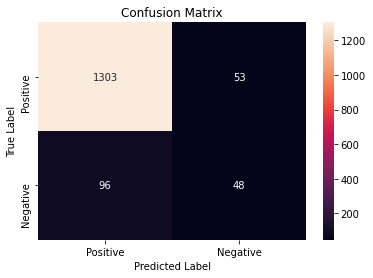

In [124]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_predict)

class_label = ["Positive", "Negative"]
df_cm = pd.DataFrame(cm, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = "d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show();

In [125]:
print('Model Sensitivity (TPR) {:.2f}'.format(recall_score(y_test,y_predict)))
print('Model Precision (PPV) {:.2f}'.format(precision_score(y_test,y_predict)))
print('Model F1-Score (harmonic mean of precision and sensitivity) {:.2f}'.format(f1_score(y_test,y_predict)))
print('Model Roc Auc Score (ROC Curve Score) {:.2f}'.format(roc_auc_score(y_test,y_predict)))

Model Sensitivity (TPR) 0.33
Model Precision (PPV) 0.48
Model F1-Score (harmonic mean of precision and sensitivity) 0.39
Model Roc Auc Score (ROC Curve Score) 0.65


In [126]:
# Classification Report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.93      0.96      0.95      1356
           1       0.48      0.33      0.39       144

    accuracy                           0.90      1500
   macro avg       0.70      0.65      0.67      1500
weighted avg       0.89      0.90      0.89      1500



##### ROC Curve

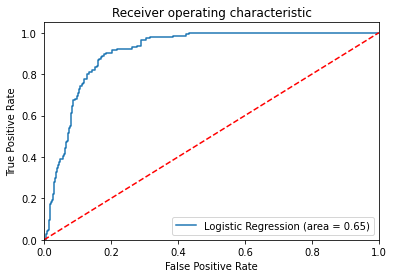

In [127]:
logit_roc_auc = roc_auc_score(y_test, logmodel.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logmodel.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

### 5. Give your reasoning on how can the model perform better? (10 marks)

In [128]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.530986
         Iterations 6
                         Results: Logit
Model:              Logit            Pseudo R-squared: -0.679   
Dependent Variable: Personal Loan    AIC:              5315.8629
Date:               2020-05-10 20:15 BIC:              5335.4145
No. Observations:   5000             Log-Likelihood:   -2654.9  
Df Model:           2                LL-Null:          -1581.0  
Df Residuals:       4997             LLR p-value:      1.0000   
Converged:          1.0000           Scale:            1.0000   
No. Iterations:     6.0000                                      
-----------------------------------------------------------------
             Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-----------------------------------------------------------------
Income      -0.0145    0.0010  -15.0236  0.0000  -0.0164  -0.0126
CCAvg       -0.0046    0.0310   -0.1495  0.8811  -0.0654   0.0562
Mortgage

### Check parameter

In [129]:
logmodel.get_params() # Checking the parameters of Logistic Regression:

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 4000,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 42,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [130]:
# ForLoop to check differents values for 'solver' :

train_score=[]
test_score=[]
classification_score=[]
solver = ['newton-cg','lbfgs','liblinear','sag','saga']
for i in solver:
    model1 = LogisticRegression(random_state=42, penalty='l2', C=0.75, solver=i, max_iter=6000)
    model1.fit(X_train, y_train) 
    y1_predict = model1.predict(X_test)     
    train_score.append(round(model1.score(X_train, y_train),3))
    test_score.append(round(model1.score(X_test, y_test),3))

# Now print scores:
print(solver)
print(train_score)
print(test_score)

['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
[0.913, 0.913, 0.913, 0.909, 0.905]
[0.901, 0.901, 0.902, 0.899, 0.9]


#### The best solver types are 'newton-cg' and 'lbfgs' 

In [131]:
# Try changing the Penalty:

model2 = LogisticRegression(random_state=42, penalty='l1', C=0.75, solver='liblinear', max_iter=4000)

model2.fit(X_train, y_train)

y2_predict = model2.predict(X_test)     

print('The Accuracy in the trainnig set is {:.2f}'.format(model2.score(X_train,y_train)))
print('The Accuracy in the testing set is {:.2f}'.format(model2.score(X_test, y_test)))   
print()
print(classification_report(y_test, y2_predict))

The Accuracy in the trainnig set is 0.91
The Accuracy in the testing set is 0.90

              precision    recall  f1-score   support

           0       0.93      0.96      0.95      1356
           1       0.48      0.33      0.39       144

    accuracy                           0.90      1500
   macro avg       0.71      0.64      0.67      1500
weighted avg       0.89      0.90      0.89      1500



##### The accuracy keep the same using 'l1' compared to 'l2' Penalty modes.
##### Saga solver type isn't so good.

In [132]:
# Changing class weight to balanced to see what happens:

model3 = LogisticRegression(random_state=42, penalty='l2', class_weight='balanced') 

model3.fit(X_train, y_train) 

y3_predict = model3.predict(X_test)     

print('The Accuracy in the trainnig set is {:.2f}'.format(model3.score(X_train, y_train)))
print('The Accuracy in the testing set is {:.2f}'.format(model3.score(X_test, y_test)))
print()
print(classification_report(y_test, y3_predict))

The Accuracy in the trainnig set is 0.85
The Accuracy in the testing set is 0.85

              precision    recall  f1-score   support

           0       0.98      0.85      0.91      1356
           1       0.37      0.82      0.51       144

    accuracy                           0.85      1500
   macro avg       0.67      0.84      0.71      1500
weighted avg       0.92      0.85      0.87      1500



In [133]:
# A ForLoop to check different values of 'C':

train_score=[]                                 
test_score=[]
C = [0.01, 0.1, 0.25, 0.5, 0.75, 1]
for i in C:
    model4 = LogisticRegression(random_state=42, penalty='l2',  solver='liblinear', C=i)
    model4.fit(X_train, y_train) 
    y4_predict = model4.predict(X_test)     
    train_score.append(round(model4.score(X_train,y_train),3))
    test_score.append(round(model4.score(X_test, y_test),3))
    
print(C)
print(train_score)
print(test_score)

[0.01, 0.1, 0.25, 0.5, 0.75, 1]
[0.904, 0.908, 0.911, 0.912, 0.913, 0.912]
[0.904, 0.901, 0.901, 0.901, 0.902, 0.902]


### Optimized Model

In [0]:
final_model = LogisticRegression(random_state=42, solver= 'liblinear', penalty='l2', C=0.5) 
final_model.fit(X_train, y_train)
final_y_predict = final_model.predict(X_test)


In [141]:
print('The Accuracy in the trainnig set is {:.2f}'.format(final_model.score(X_train,y_train)))
print('The Accuracy in the testing set is {:.2f}'.format(final_model.score(X_test, y_test)))
print()
print(classification_report(y_test, final_y_predict))

The Accuracy in the trainnig set is 0.91
The Accuracy in the testing set is 0.90

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      1356
           1       0.48      0.30      0.37       144

    accuracy                           0.90      1500
   macro avg       0.70      0.63      0.66      1500
weighted avg       0.89      0.90      0.89      1500



### Final Confusion Matrix

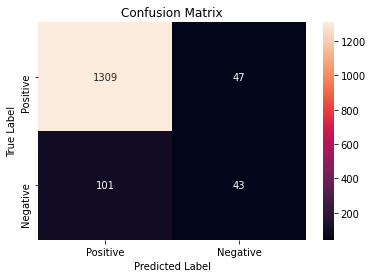

In [142]:
finalcm = confusion_matrix(y_test, final_y_predict)

class_label = ["Positive", "Negative"]
df_cm = pd.DataFrame(finalcm, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = "d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show();

In [144]:
print('Model Sensitivity (TPR) {:.2f}'.format(recall_score(y_test,final_y_predict)))
print('Model Precision (PPV) {:.2f}'.format(precision_score(y_test,final_y_predict)))
print('Model F1-Score (harmonic mean of precision and sensitivity) {:.2f}'.format(f1_score(y_test,final_y_predict)))
print('Model Roc Auc Score (ROC Curve Score) {:.2f}'.format(roc_auc_score(y_test,final_y_predict)))

Model Sensitivity (TPR) 0.30
Model Precision (PPV) 0.48
Model F1-Score (harmonic mean of precision and sensitivity) 0.37
Model Roc Auc Score (ROC Curve Score) 0.63


## TENSORFLOW 2.0

In [178]:
%tensorflow_version 2.x
import os
from __future__ import absolute_import, division, print_function
import tensorflow as tf

print('The Tensorflow version is {}'.format(tf.__version__))

import tempfile

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

The Tensorflow version is 2.2.0-rc4


In [0]:
mpl.rcParams['figure.figsize'] = (12, 10)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

###### Look to the Personal Loan (Taget Variable) imbalance:

In [162]:
neg, pos = np.bincount(cleaned_df['Personal Loan'])
total = neg + pos
print('Examples:\n    Total: {}\n    Positive: {} ({:.2f}% of total)\n'.format(
    total, pos, 100 * pos / total))

Examples:
    Total: 5000
    Positive: 480 (9.60% of total)



##### There is a small fraction of positive samples with Personal Loan

In [0]:
# Use a utility from sklearn to split and shuffle our dataset.
train_df, test_df = train_test_split(cleaned_df, test_size=0.2)
train_df, val_df = train_test_split(train_df, test_size=0.2)

In [0]:
# Form np arrays of labels and features.
train_labels = np.array(train_df.pop('Personal Loan'))
bool_train_labels = train_labels != 0
val_labels = np.array(val_df.pop('Personal Loan'))
test_labels = np.array(test_df.pop('Personal Loan'))

train_features = np.array(train_df)
val_features = np.array(val_df)
test_features = np.array(test_df)

##### Normalize the input features using the sklearn StandardScaler.

In [165]:
scaler = StandardScaler()
train_features = scaler.fit_transform(train_features)

val_features = scaler.transform(val_features)
test_features = scaler.transform(test_features)

train_features = np.clip(train_features, -5, 5)
val_features = np.clip(val_features, -5, 5)
test_features = np.clip(test_features, -5, 5)


print('Training labels shape:', train_labels.shape)
print('Validation labels shape:', val_labels.shape)
print('Test labels shape:', test_labels.shape)

print('Training features shape:', train_features.shape)
print('Validation features shape:', val_features.shape)
print('Test features shape:', test_features.shape)

Training labels shape: (3200,)
Validation labels shape: (800,)
Test labels shape: (1000,)
Training features shape: (3200, 3)
Validation features shape: (800, 3)
Test features shape: (1000, 3)


### Look at the data distribution
Next compare the distributions of the positive and negative examples over a few features. Good questions to ask yourself at this point are:

Do these distributions make sense?
Yes. You've normalized the input and these are mostly concentrated in the +/- 2 range.

Can you see the difference between the ditributions?
Yes the positive examples contain a much higher rate of extreme values.

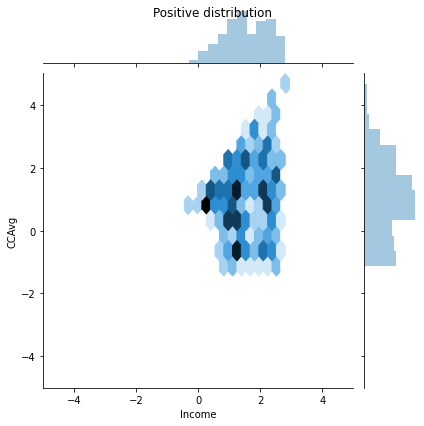

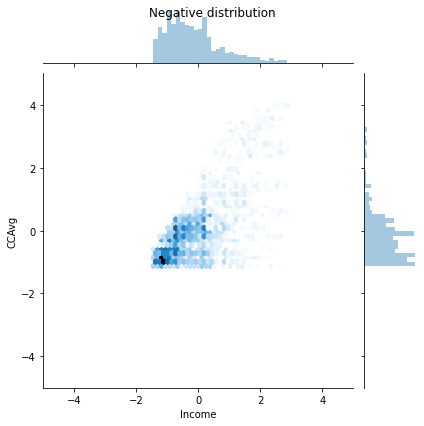

In [166]:
pos_df = pd.DataFrame(train_features[ bool_train_labels], columns = train_df.columns)
neg_df = pd.DataFrame(train_features[~bool_train_labels], columns = train_df.columns)

sns.jointplot(pos_df['Income'], pos_df['CCAvg'],
              kind='hex', xlim = (-5,5), ylim = (-5,5))
plt.suptitle("Positive distribution")

sns.jointplot(neg_df['Income'], neg_df['CCAvg'],
              kind='hex', xlim = (-5,5), ylim = (-5,5))
_ = plt.suptitle("Negative distribution")

### Define the model and metrics
Define a function that creates a simple neural network with a densly connected hidden layer, a dropout layer to reduce overfitting, and an output sigmoid layer that returns the probability of a transaction being fraudulent:

#### The model cound perform better if:
 - The unbalanced categorical variable 'Personal Loan' are balanced during the aquisicion
 - We could use the StratifiedShuffleSplit to 'balance de percentage during the split'
 - Logistic Regression algorithm has a high accuracy in both training and testing sets

In [0]:
METRICS = [
      tf.keras.metrics.TruePositives(name='tp'),
      tf.keras.metrics.FalsePositives(name='fp'),
      tf.keras.metrics.TrueNegatives(name='tn'),
      tf.keras.metrics.FalseNegatives(name='fn'), 
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall'),
      tf.keras.metrics.AUC(name='auc'),
]

def make_model(metrics = METRICS, output_bias=None):
  if output_bias is not None:
    output_bias = tf.keras.initializers.Constant(output_bias)
  model = tf.keras.Sequential([
      tf.keras.layers.Dense(
          16, activation='relu',
          input_shape=(train_features.shape[-1],)),
      tf.keras.layers.Dropout(0.5),
      tf.keras.layers.Dense(1, activation='sigmoid',
                         bias_initializer=output_bias),
  ])

  model.compile(
      optimizer=tf.keras.optimizers.Adam(lr=1e-3),
      loss=tf.keras.losses.BinaryCrossentropy(),
      metrics=metrics)

  return model

### Understanding useful metrics

Notice that there are a few metrics defined above that can be computed by the model that will be helpful when evaluating the performance.

- **False negatives** and **false positives** are samples that were incorrectly classified.

- **True negatives** and **true positives** are samples that were correctly classified.

- **Accuracy** is the percentage of examples correctly classified

- **Precision** is the percentage of predicted positives that were correctly classified

- **Recall** is the percentage of actual positives that were correctly classified

- **AUC** refers to the Area Under the Curve of a Receiver Operating Characteristic curve (ROC-AUC). 

This metric is equal to the probability that a classifier will rank a random positive sample higher than than a random negative sample.

### **Note:** Accuracy is not a helpful metric for this task. You can 99.8%+ accuracy on this task by predicting False all the time.

### Baseline model

####Build the model

Now create and train your model using the function that was defined earlier. 

###### **Notice** that the model is fit using a larger than default batch size of 2048, this is important to ensure that each batch has a decent chance of containing a few positive samples. If the batch size was too small, they would likely have no Personal Loan to learn from.

In [0]:
EPOCHS = 100
BATCH_SIZE = 2048

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_auc', 
    verbose=1,
    patience=10,
    mode='max',
    restore_best_weights=True)

In [171]:
model = make_model()
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 16)                64        
_________________________________________________________________
dropout_1 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 81
Trainable params: 81
Non-trainable params: 0
_________________________________________________________________


##### Test run the model:

In [172]:
model.predict(train_features[:10])

array([[0.367],
       [0.387],
       [0.373],
       [0.739],
       [0.363],
       [0.386],
       [0.409],
       [0.448],
       [0.283],
       [0.403]], dtype=float32)

#### **Optional:** Set the correct initial bias.

These are initial guesses are not great. You know the dataset is imbalanced. Set the output layer's bias to reflect that (See: A Recipe for Training Neural Networks: "init well"). This can help with initial convergence.

With the default bias initialization the loss should be about math.log(2) = 0.69314

In [173]:
results = model.evaluate(train_features, train_labels, batch_size=BATCH_SIZE, verbose=0)
print("Loss: {:0.4f}".format(results[0]))

Loss: 0.5905


The correct bias to set can be derived from:


In [174]:
initial_bias = np.log([pos/neg])
initial_bias

array([-2.242])

Set that as the initial bias, and the model will give much more reasonable initial guesses.

It should be near: pos/total = 0.0018

In [175]:
model = make_model(output_bias = initial_bias)
model.predict(train_features[:10])

array([[0.083],
       [0.09 ],
       [0.071],
       [0.037],
       [0.068],
       [0.07 ],
       [0.078],
       [0.071],
       [0.065],
       [0.078]], dtype=float32)

With this initialization the initial loss should be approximately:

In [176]:
results = model.evaluate(train_features, train_labels, batch_size=BATCH_SIZE, verbose=0)
print("Loss: {:0.4f}".format(results[0]))

Loss: 0.3877


This initial loss is about 50 times less than if would have been with naive initilization.

This way the model doesn't need to spend the first few epochs just learning that positive examples are unlikely. This also makes it easier to read plots of the loss during training.

### **Checkpoint the initial weights**

#####To make the various training runs more comparable, keep this initial model's weights in a checkpoint file, and load them into each model before training.

In [0]:
initial_weights = os.path.join(tempfile.mkdtemp(),'initial_weights')
model.save_weights(initial_weights)

### Confirm that the bias fix helps

Before moving on, confirm quick that the careful bias initialization actually helped.

Train the model for 20 epochs, with and without this careful initialization, and compare the losses:

In [0]:
model = make_model()
model.load_weights(initial_weights)
model.layers[-1].bias.assign([0.0])
zero_bias_history = model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=20,
    validation_data=(val_features, val_labels), 
    verbose=0)

In [0]:
model = make_model()
model.load_weights(initial_weights)
careful_bias_history = model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=20,
    validation_data=(val_features, val_labels), 
    verbose=0)

In [0]:
def plot_loss(history, label, n):
  # Use a log scale to show the wide range of values.
  plt.semilogy(history.epoch,  history.history['loss'],
               color=colors[n], label='Train '+label)
  plt.semilogy(history.epoch,  history.history['val_loss'],
          color=colors[n], label='Val '+label,
          linestyle="--")
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  
  plt.legend()

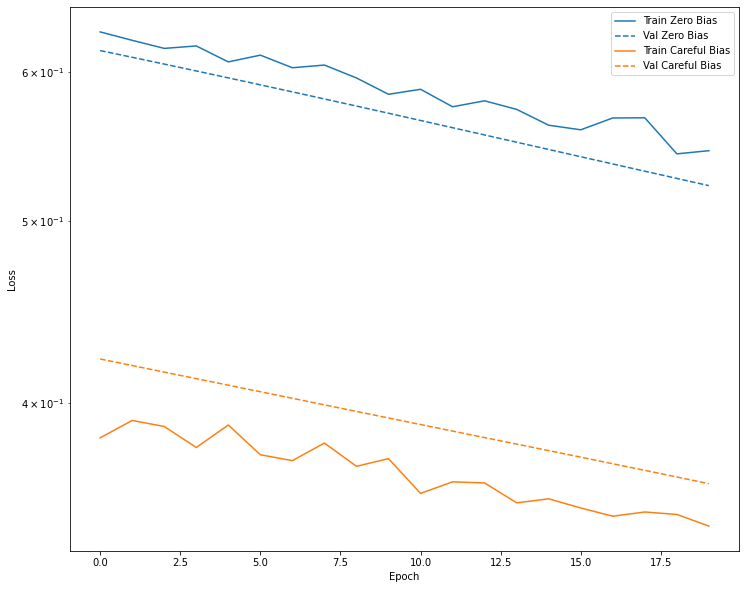

In [183]:
plot_loss(zero_bias_history, "Zero Bias", 0)
plot_loss(careful_bias_history, "Careful Bias", 1)

The above figure makes it clear: In terms of validation loss, on this problem, this careful initialization gives a clear advantage.

## Train the model

In [0]:
model = make_model()
model.load_weights(initial_weights)
baseline_history = model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks = [early_stopping],
    validation_data=(val_features, val_labels))

### Check training history

In this section, you will produce plots of your model's accuracy and loss on the training and validation set. 

Additionally, you can produce these plots for any of the metrics you created above. False negatives are included as an example.

In [0]:
def plot_metrics(history):
  metrics =  ['loss', 'auc', 'precision', 'recall']
  for n, metric in enumerate(metrics):
    name = metric.replace("_"," ").capitalize()
    plt.subplot(2,2,n+1)
    plt.plot(history.epoch,  history.history[metric], color=colors[0], label='Train')
    plt.plot(history.epoch, history.history['val_'+metric],
             color=colors[0], linestyle="--", label='Val')
    plt.xlabel('Epoch')
    plt.ylabel(name)
    if metric == 'loss':
      plt.ylim([0, plt.ylim()[1]])
    elif metric == 'auc':
      plt.ylim([0.8,1])
    else:
      plt.ylim([0,1])

    plt.legend()

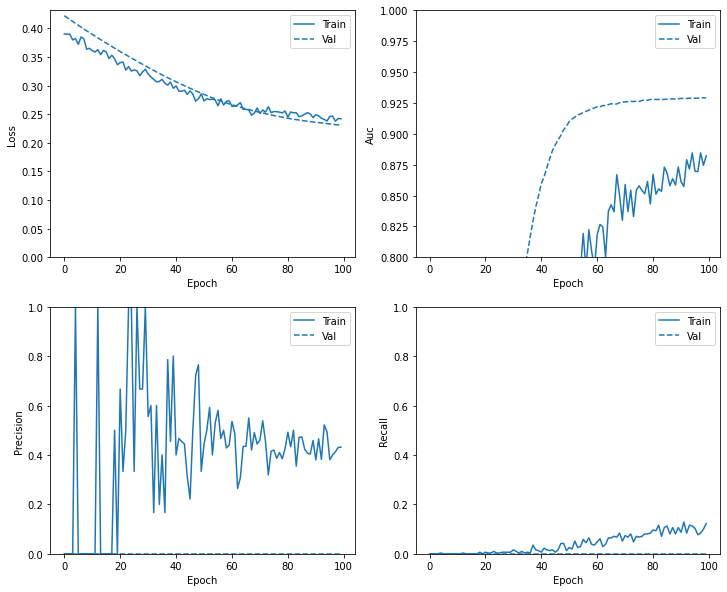

In [186]:
plot_metrics(baseline_history)

#### **Note:** That the validation curve generally performs better than the training curve. This is mainly caused by the fact that the dropout layer is not active when evaluating the model.

### Evaluate metrics

You can use a confusion matrix to summarize the actual vs. predicted labels where the X axis is the predicted label and the Y axis is the actual label.

In [0]:
train_predictions_baseline = model.predict(train_features, batch_size=BATCH_SIZE)
test_predictions_baseline = model.predict(test_features, batch_size=BATCH_SIZE)

In [0]:
def plot_cm(labels, predictions, p=0.5):
  cm = confusion_matrix(labels, predictions > p)
  plt.figure(figsize=(5,5))
  sns.heatmap(cm, annot=True, fmt="d")
  plt.title('Confusion matrix @{:.2f}'.format(p))
  plt.ylabel('Actual label')
  plt.xlabel('Predicted label')

  print('Bad Personal Loan Denied (True Negatives): ', cm[0][0])
  print('Good Personal Loan Incorrectly Denied (False Positives): ', cm[0][1])
  print('Bad Personal Loan Not-Denied (False Negatives): ', cm[1][0])
  print('Good Personal Loan Not-Denied (True Positives): ', cm[1][1])
  print('Total Personal Loan Not-Denied: ', np.sum(cm[1]))

Evaluate your model on the test dataset and display the results for the metrics you created above.

loss :  0.1927649825811386
tp :  1.0
fp :  0.0
tn :  918.0
fn :  81.0
accuracy :  0.9190000295639038
precision :  1.0
recall :  0.012195121496915817
auc :  0.9238203763961792

Bad Personal Loan Denied (True Negatives):  918
Good Personal Loan Incorrectly Denied (False Positives):  0
Bad Personal Loan Not-Denied (False Negatives):  81
Good Personal Loan Not-Denied (True Positives):  1
Total Personal Loan Not-Denied:  82


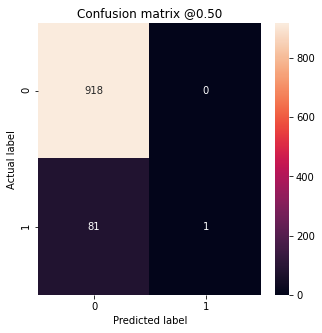

In [192]:
baseline_results = model.evaluate(test_features, test_labels,
                                  batch_size=BATCH_SIZE, verbose=0)
for name, value in zip(model.metrics_names, baseline_results):
  print(name, ': ', value)
print()

plot_cm(test_labels, test_predictions_baseline)

If the model had predicted everything perfectly, this would be a diagonal matrix where values off the main diagonal, indicating incorrect predictions, would be zero. In this case the matrix shows that you have relatively few false positives, meaning that there were relatively few legitimate transactions that were incorrectly flagged. However, you would likely want to have even fewer false negatives despite the cost of increasing the number of false positives. This trade off may be preferable because false negatives would allow fraudulent transactions to go through, whereas false positives may cause an email to be sent to a customer to ask them to verify their card activity.

### Plot the ROC

Now plot the ROC. This plot is useful because it shows, at a glance, the range of performance the model can reach just by tuning the output threshold.

In [0]:
def plot_roc(name, labels, predictions, **kwargs):
  fp, tp, _ = sklearn.metrics.roc_curve(labels, predictions)

  plt.plot(100*fp, 100*tp, label=name, linewidth=2, **kwargs)
  plt.xlabel('False positives [%]')
  plt.ylabel('True positives [%]')
  plt.xlim([-0.5,20])
  plt.ylim([80,100.5])
  plt.grid(True)
  ax = plt.gca()
  ax.set_aspect('equal')

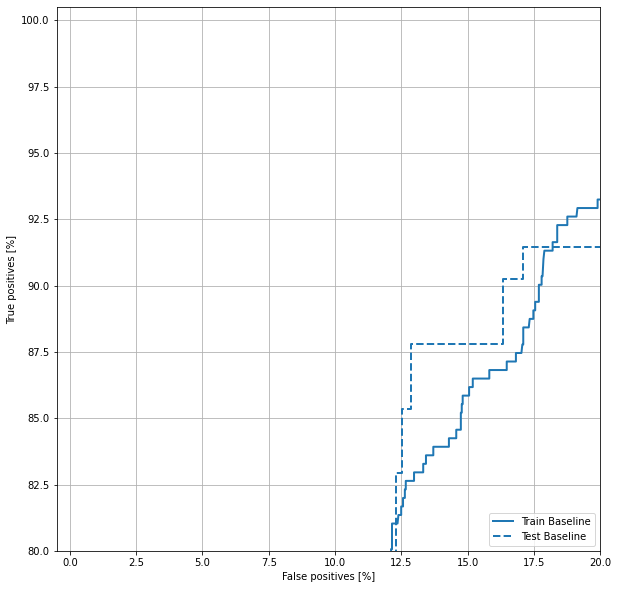

In [200]:
plot_roc("Train Baseline", train_labels, train_predictions_baseline, color=colors[0])
plot_roc("Test Baseline", test_labels, test_predictions_baseline, color=colors[0], linestyle='--')
plt.legend(loc='lower right');

### 6. Give Business understanding of your model? (5 marks)

### Business Insights:

###### The Tera Bank wants loan for elegible people and dont give loans to people who may default.

###### So they want a high True Positive value and a low False Positive value. 

###### If False Positive is high the bank would lose money so Precision is the important metric.

###### In case of False Negative, the Bank will lose few customers but that's okay, because the bank want to retain money more than losing money to customers that wont pay back.

###### After achieving the desired accuracy we can deploy the model for practical use. Now the Bank can predict who is eligible for Personal Loan. They can use the model for upcoming customers.